# Powerlifting Data Analysis

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/9x/hp4yd9t517q0b2m13pghld080000gn/T/ipykernel_65671/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load Data Set
https://www.kaggle.com/datasets/dansbecker/powerlifting-database?select=meets.csv

In [3]:
df = pd.read_csv("data/openpowerlifting.csv")

### Get aquainted with data

In [4]:
df.columns

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg',
       'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks'],
      dtype='object')

In [5]:
df.shape

(386414, 17)

In [6]:
print(df.duplicated().sum() / df.shape[0])

df.loc[df.duplicated(keep=False)].sort_values(["BestBenchKg"])

df=df.drop_duplicates()

0.0014104043849342933


Then, we have the rows where the inputs are empty. This is caused by a disqualification. The Place column will be "DQ". We can find and save how many disqualifications there were and then remove the rows because they will skew our averages.

In [7]:
x = df["Place"] == "DQ"
disqualifications_sum = x.sum()

dqs = df[ (df['Place'] == "DQ")].index
df.drop(dqs , inplace=True)

I'm noticing that the columns are pretty well standardized. There won't be too much cleaned needed, but the columns that end in 4kg seem to be empty, so I will do some more analysis and probably drop them.
About 0.14% of columns are duplicated, so we can drop all the duplicates without much more thought.

In [8]:
df["Bench4Kg"].notna().sum()
df["Squat4Kg"].notna().sum()
df["Deadlift4Kg"].notna().sum()

temp = df["Place"] == "1"
temp.sum()



194329

Less than 1% of columns have a value in the columns ending in 4Kg. They are going to be dropped.
I will also drop the "place" column because an unusually high percent (~50%) of columns say 1.

### Drop Columns

In [9]:
df.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [10]:
df.drop(["Bench4Kg","Squat4Kg","Deadlift4Kg","Place"], axis =1)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,142.88,95.25,163.29,401.42,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,95.25,NaN,95.25,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,NaN,Elite,113.58,125,NaN,NaN,347.50,347.50,202.60
386410,8481,Justin Zottl,M,Multi-ply,NaN,Elite,119.02,125,NaN,NaN,322.50,322.50,185.77
386411,8481,Jake Anderson,M,Multi-ply,NaN,Elite,120.29,125,NaN,NaN,367.50,367.50,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,NaN,Elite,126.73,140,NaN,NaN,320.00,320.00,181.85


# Exploratory Data Analysis

[Text(0.5, 1.0, 'Distribution of Total Kgs Lifted')]

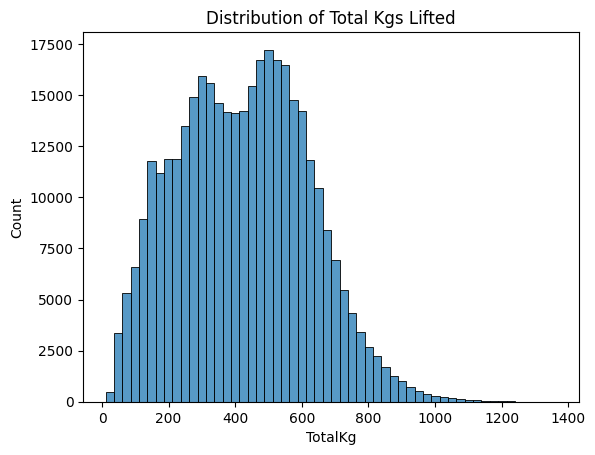

In [11]:
sns.histplot(data=df, x="TotalKg", binwidth=25).set(title="Distribution of Total Kgs Lifted")

In [12]:
df.loc[df["TotalKg"] == df["TotalKg"].max()]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
57011,1412,Dave Hoff,M,Multi-ply,NaN,Pro Open,131.09,140,NaN,560.19,NaN,437.72,NaN,367.41,1365.31,1,771.07


# Statistical Analysis

### Question 1: How much did each lift contribute to competitors totals?

Text(0.5, 1.0, 'Contribution of each lift')

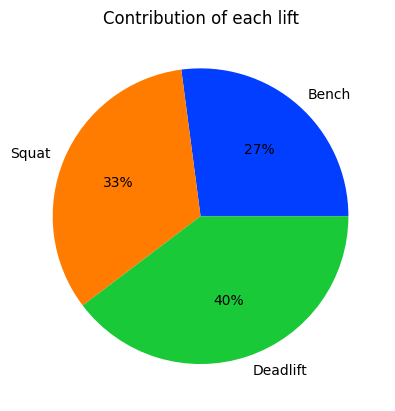

In [13]:
contribution_data = [df["BestBenchKg"].sum(),df["BestSquatKg"].sum(),df["BestDeadliftKg"].sum()]
keys = ["Bench", "Squat", "Deadlift"]

palette_color = sns.color_palette('bright')

plt.pie(contribution_data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Contribution of each lift")


### Question 2: How much does varying levels of equipment affect average totals?

Least help to most help: Raw, Straps, Wraps, Single-Ply, Multi-Ply. 
But we won't consider straps because there are only 7 data points

[Text(0.5, 1.0, 'Average Total by Level of Equipment')]

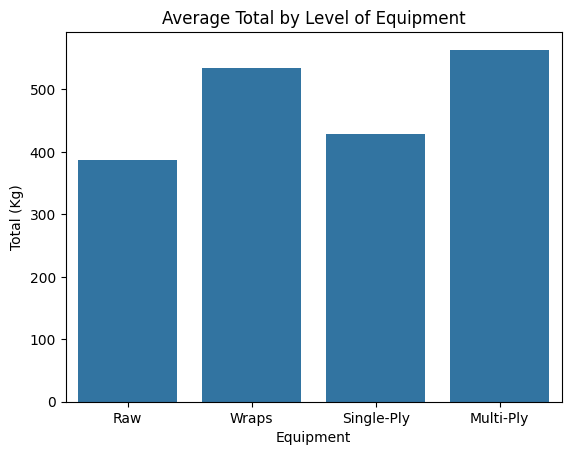

In [24]:
temp = df.loc[df["Equipment"] == "Raw"]
avg_raw_total = temp["TotalKg"].sum() / temp.shape[0]
temp = df.loc[df["Equipment"] == "Wraps"]
avg_wraps_total = temp["TotalKg"].sum() / temp.shape[0]
temp = df.loc[df["Equipment"] == "Single-ply"]
avg_single_ply_total = temp["TotalKg"].sum() / temp.shape[0]
temp = df.loc[df["Equipment"] == "Multi-ply"]
avg_multi_ply_total = temp["TotalKg"].sum() / temp.shape[0]
data=[avg_raw_total, avg_wraps_total,avg_single_ply_total,avg_multi_ply_total]

data = pd.DataFrame({'Equipment':["Raw", "Wraps", "Single-Ply", "Multi-Ply"], 
                         'Total (Kg)':[avg_raw_total, avg_wraps_total,avg_single_ply_total,avg_multi_ply_total]})
sns.barplot(data=data, x = "Equipment", y= "Total (Kg)").set(title="Average Total by Level of Equipment")




#temp["TotalKg"].sum()

### Question 3: What age is strongest for each gender?

First, we have to divide by gender, then we can create a histogram displaying the totals by buckets of age.

In [26]:
df["Bins"] = pd.cut(x=df["Age"], bins = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80],labels = ["1 to 5", "6 to 10","11 to 15","16 to 20","21 to 25","26 to 30","31 to 35","36 to 40","41 to 45","46 to 50","51 to 55","56 to 60","61 to 65","66 to 70","71 to 75","76 to 80"])

Males = df.loc[df["Sex"] == "M"]
Females = df.loc[df["Sex"] == "F"]

df.head()



,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks,Bins
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05,46 to 50
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38,41 to 45
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38,41 to 45
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29,41 to 45
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47,16 to 20
